*Abstract* : In this blog post, we will be classifying penguins based on a list of attributes and measurements using a machine learning model. First, we will make some visuals for the given data to see if we can find an traits common among a species of penguin. Then, we will train our model and test it on data that the model has not seen.  

The following cell reads in the data set that we will be working with. As you can see in the data frame each row contains both qualitative and quantitative attributes of a single penguin. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN



*Discussion* : 
The first table shown displays the number of each species of penguin on each island mentioned in the data. The second table displays the total number of penguins grouped by their species. After looking at these tables we notice that Chinstrap penguins only live on the island Dream and Gentoo penguins only live on the island Biscoe. Now it is easy for us to tell the difference between them because they live in different geographic locations according to our data. Since Adelie penguins live on all three islands, we still need a way to distinguish them from Chinstraps and Gentoo.   

In [4]:
train.groupby(["Species", "Island"]).size()


Species                                    Island   
Adelie Penguin (Pygoscelis adeliae)        Biscoe       33
                                           Dream        45
                                           Torgersen    42
Chinstrap penguin (Pygoscelis antarctica)  Dream        57
Gentoo penguin (Pygoscelis papua)          Biscoe       98
dtype: int64

In [93]:
train.groupby("Species").size()

Species
Adelie Penguin (Pygoscelis adeliae)          120
Chinstrap penguin (Pygoscelis antarctica)     57
Gentoo penguin (Pygoscelis papua)             98
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [8]:
X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,51.1,16.5,225.0,5250.0,8.20660,-26.36863,True,False,False,True,False,True,False,True
271,35.9,16.6,190.0,3050.0,8.47781,-26.07821,False,False,True,True,True,False,True,False
272,39.5,17.8,188.0,3300.0,9.66523,-25.06020,False,True,False,True,False,True,True,False
273,36.7,19.3,193.0,3450.0,8.76651,-25.32426,False,False,True,True,False,True,True,False


*Discussion* : In the scatter plots below, penguin body mass to flipper length. On the right side we can see that as a general trend higher body mass is correlated with longer flippers, and a lower body mass is correlated with shorter flippers. The scatter plot on the right identifies the species of each penguin on the graph. Looking at how the top right portion is filled with Gentoo penguins, we can come to the conclusion that Gentoo penguins tend to have a higher body mass and longer flippers. 

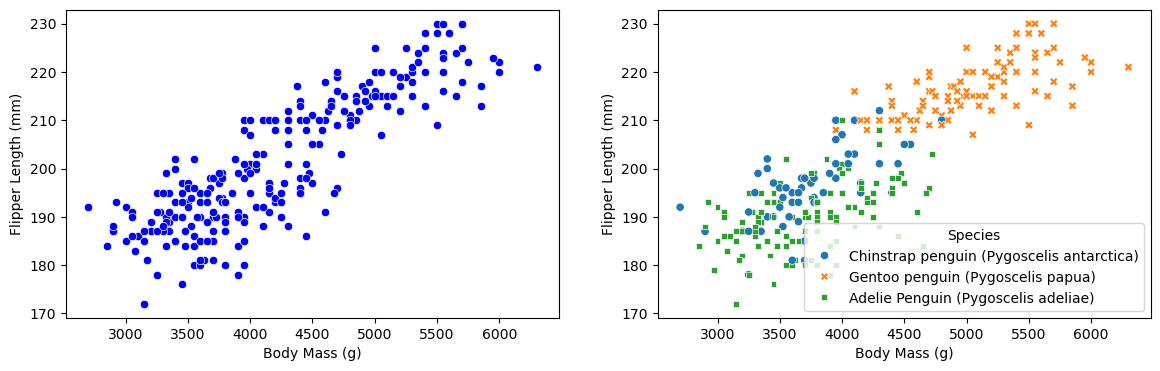

In [ ]:

fig, ax  = plt.subplots(1,2, figsize = (14,4))

p1 = sns.scatterplot(X_train, x="Body Mass (g)", y= "Flipper Length (mm)", ax = ax[0], color= "blue")
p2 = sns.scatterplot(train, x ="Body Mass (g)", y= "Flipper Length (mm)", ax = ax[1], hue = "Species", style = "Species")

*Discussion* : In the scatter plot below were Delta 13 C is compared to culmen length, we see that Chinstraps are concentrated at the top right were as the Adelie are more towards the bottom left. This shows that Chinstraps typically have a higher Delta 13 C and longer culmens. 

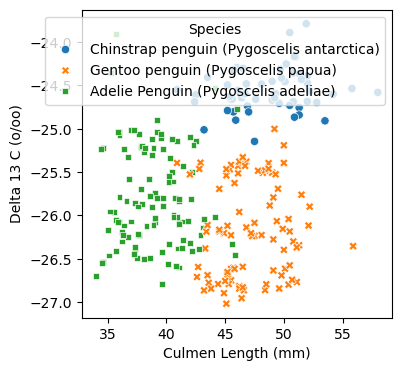

In [22]:
fig , ax = plt.subplots(1, figsize = (4,4))

p1 = sns.scatterplot(train, x = "Culmen Length (mm)", y = "Delta 13 C (o/oo)", color = "red", hue ="Species", style = "Species")


In [102]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


In [110]:
X_train.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Island_Biscoe', 'Island_Dream', 'Island_Torgersen',
       'Stage_Adult, 1 Egg Stage', 'Clutch Completion_No',
       'Clutch Completion_Yes', 'Sex_FEMALE', 'Sex_MALE'],
      dtype='object')

In [30]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
island = ['Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
all_qual_cols = ["Clutch Completion", "Sex", 'Island']
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 13 C (o/oo)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)
    LR = LogisticRegression()
    LR.fit(X_train[cols], y_train)
    print(LR.score(X_train[cols], y_train))
    
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score.

['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
0.95703125
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
0.9453125
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
0.8359375
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Flipper Length (mm)']
0.8203125
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']


c:\Users\robsa\anaconda3\envs\ml-451\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\robsa\anaconda3\envs\ml-451\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

0.9375
['Clutch Completion_No', 'Clutch Completion_Yes', 'Flipper Length (mm)', 'Delta 13 C (o/oo)']
0.80078125
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)']
0.99609375
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)']
0.9609375
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
0.94140625
['Sex_FEMALE', 'Sex_MALE', 'Culmen Depth (mm)', 'Flipper Length (mm)']
0.78515625
['Sex_FEMALE', 'Sex_MALE', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']


c:\Users\robsa\anaconda3\envs\ml-451\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\robsa\anaconda3\envs\ml-451\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

0.94921875
['Sex_FEMALE', 'Sex_MALE', 'Flipper Length (mm)', 'Delta 13 C (o/oo)']
0.87109375
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)']
0.99609375
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Flipper Length (mm)']
0.87109375
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
0.97265625
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Depth (mm)', 'Flipper Length (mm)']
0.86328125
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']
0.92578125
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Flipper Length (mm)', 'Delta 13 C (o/oo)']
0.94921875


c:\Users\robsa\anaconda3\envs\ml-451\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\robsa\anaconda3\envs\ml-451\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [43]:
from sklearn.linear_model import LogisticRegression

# cols = ["Flipper Length (mm)", "Body Mass (g)", "Island_Biscoe", "Island_Dream", "Island_Torgersen"] got 0.7578125
# cols = ["Flipper Length (mm)", "Culmen Length (mm)", "Island_Biscoe", "Island_Dream", "Island_Torgersen"] got 0.87109375
# cols = ["Body Mass (g)", "Culmen Length (mm)", "Island_Biscoe", "Island_Dream", "Island_Torgersen"] got 0.83203125
# cols = ["Flipper Length (mm)", "Culmen Length (mm)", "Clutch Completion_No", "Clutch Completion_Yes"] got 0.9453125
# Top Performers 
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']# got 0.99609375
cols2 = ['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)']# got 0.99609375
LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)

c:\Users\robsa\anaconda3\envs\ml-451\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99609375

In [44]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[cols], y_test)

1.0

In [47]:
LR2 = LogisticRegression()
LR2.fit(X_test[cols], y_test)
LR2.score(X_test[cols], y_test)

c:\Users\robsa\anaconda3\envs\ml-451\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [45]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

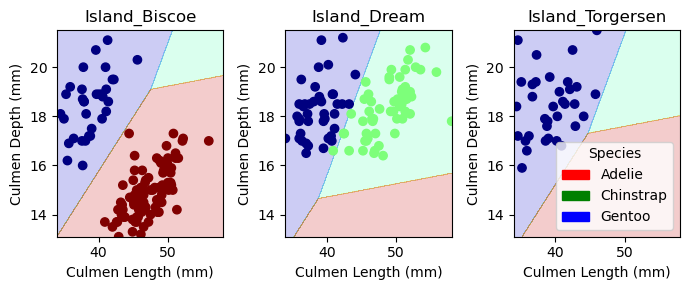

In [46]:
plot_regions(LR, X_train[cols], y_train)

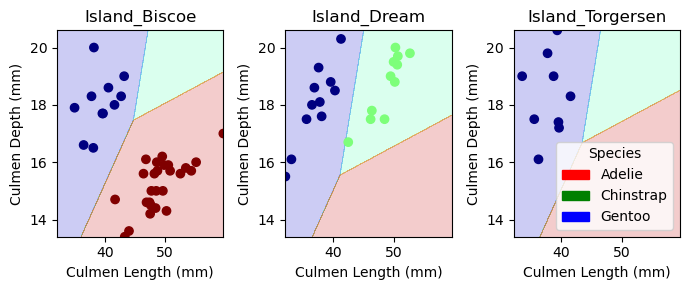

In [48]:
plot_regions(LR2, X_test[cols], y_test)

In [54]:
from sklearn.metrics import confusion_matrix

y_pred = LR.predict(X_train[cols])
confusion_matrix(y_train, y_pred)

array([[108,   0,   0],
       [  1,  55,   0],
       [  0,   0,  92]], dtype=int64)

In [55]:
y_pred2 = LR.predict(X_test[cols])
confusion_matrix(y_test, y_pred2)

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]], dtype=int64)

According to the to the confusion matrix, there is a small probablity that a Chinstrap penguin would be predicted to be an Adelie penguin. 

*Discussion* : We learned that the geographic location of penguins important for determining the species of penguin. Culmen length and depth also are big indicators that helped out model predict accurately. 